### Importing necessary Libraries

In [204]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree,export_text
import matplotlib.pyplot as plt
%matplotlib inline

### importing dataset

In [33]:
balloon = pd.read_csv('https://raw.githubusercontent.com/edyoda/Data-Scientist-program/master/Practice%20Problems/data/yellow-small%2Badult-stretch.data',names=['color','size','act','age','inflated'])

In [197]:
balloon.head()

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,T
4,YELLOW,LARGE,STRETCH,ADULT,T


the dataset consists of 5 columns of which inflated the target column

**using Ordinalencoder to convert categorical columns into numerical**

In [37]:
oe = OrdinalEncoder()
feature = oe.fit_transform(balloon.drop(columns='inflated'))

In [332]:
feature

array([[1., 1., 1., 0.],
       [1., 1., 1., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [0., 1., 1., 0.],
       [0., 1., 1., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.]])

### creating a dataframe after converting feature to numerical

In [48]:
df = pd.DataFrame(feature,columns = ['color','size','act','age']).join(balloon.inflated)

In [50]:
df.sample(5)

,color,size,act,age,inflated
12,0.0,0.0,1.0,0.0,T
10,0.0,1.0,0.0,0.0,F
2,1.0,1.0,0.0,0.0,T
0,1.0,1.0,1.0,0.0,T
13,0.0,0.0,1.0,1.0,F


#### unique values of each column in data frame

In [51]:
unique = {}
for col in df.drop(columns = 'inflated').columns:
    unique[col] = list(df[col].unique())
    
unique

{'color': [1.0, 0.0], 'size': [1.0, 0.0], 'act': [1.0, 0.0], 'age': [0.0, 1.0]}

#### The attributes available are :
    color,  size,  act,   age
    
out of which we have to select the best

### Discretizing data using Binning

* for all the columns the value ranges from [0,1]
    * Buckets for each column [.,0.5,.]

### Decision rules for each column

(1) color < 0.5    
(2) size  < 0.5    
(3) act   < 0.5    
(4) age   < 0.5 

# GINI IMPURITY

### calculating Initial Gini before spiliting the data

gini of a dataset

p1 * (1-p1) + p2 * (1-p2) + p3 * (1-p3) + ......................

where p1,p2,p3 are the probabilities of each class of the target variable

In [56]:
df.inflated.value_counts()

F    9
T    7
Name: inflated, dtype: int64

In [57]:
GiniBeforeSplit = (9/16) * (1-9/16)  + (7/16) * (1-7/16)
GiniBeforeSplit

0.4921875

now we have to select the best decision to split the data which gives maximun gini gain   
calculating Gain for each split

**Question(1) => color < 0.5**

In [64]:
df[df.color<=0.5].inflated.value_counts() #left

F    6
T    2
Name: inflated, dtype: int64

In [70]:
df[df.color>0.5].inflated.value_counts() #right

T    5
F    3
Name: inflated, dtype: int64

In [109]:
GiniLeft = (6/8) * (1-6/8) + (2/8) * (1-2/8)
GiniRight = (5/8) * (1-5/8) + (3/8) * (1-3/8)

GiniSplit = (8/16) * GiniLeft + (8/16) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(1) : ',GiniGain)

GiniGain for question(1) :  0.0703125


**Question(2) => size < 0.5**

In [80]:
df[df['size']<=0.5].inflated.value_counts() #left

F    6
T    2
Name: inflated, dtype: int64

In [81]:
df[df['size']>0.5].inflated.value_counts() #right

T    5
F    3
Name: inflated, dtype: int64

In [108]:
GiniLeft = (6/8) * (1-6/8) + (2/8) * (1-2/8)
GiniRight = (5/8) * (1-5/8) + (3/8) * (1-3/8)

GiniSplit = (8/16) * GiniLeft + (8/16) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(2) : ',GiniGain)

GiniGain for question(2) :  0.0703125


**Question(3) => act < 0.5**

In [85]:
df[df['act']<=0.5].inflated.value_counts() #left

F    6
T    2
Name: inflated, dtype: int64

In [87]:
df[df['size']>0.5].inflated.value_counts() #right

T    5
F    3
Name: inflated, dtype: int64

In [107]:
GiniLeft = (6/8) * (1-6/8) + (2/8) * (1-2/8)
GiniRight = (5/8) * (1-5/8) + (3/8) * (1-3/8)

GiniSplit = (8/16) * GiniLeft + (8/16) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(3) : ',GiniGain)

GiniGain for question(3) :  0.0703125


**Question(4) => age < 0.5**

In [89]:
df[df['age']<=0.5].inflated.value_counts() #left

T    5
F    3
Name: inflated, dtype: int64

In [90]:
df[df['age']>0.5].inflated.value_counts() #right

F    6
T    2
Name: inflated, dtype: int64

In [106]:
GiniRight = (6/8) * (1-6/8) + (2/8) * (1-2/8)
GiniLeft = (5/8) * (1-5/8) + (3/8) * (1-3/8)

GiniSplit = (8/16) * GiniLeft + (8/16) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(4) : ',GiniGain)

GiniGain for question(4) :  0.0703125


#### GiniGain is same for  all the questions,hence we can randomly choose any decision to split the data

* selecting the question(1)   i.e attribute color

### generating subtrees under root

In [113]:
subtree_n1_r = df[df.color>0.5]
subtree_n1_l = df[df.color<=0.5]

### working on left subtree under the root

In [114]:
subtree_n1_l

,color,size,act,age,inflated
8,0.0,1.0,1.0,0.0,T
9,0.0,1.0,1.0,1.0,F
10,0.0,1.0,0.0,0.0,F
11,0.0,1.0,0.0,1.0,F
12,0.0,0.0,1.0,0.0,T
13,0.0,0.0,1.0,1.0,F
14,0.0,0.0,0.0,0.0,F
15,0.0,0.0,0.0,1.0,F


In [122]:
subtree_n1_l.inflated.value_counts()

F    6
T    2
Name: inflated, dtype: int64

In [123]:
GiniBeforeSplit = (6/8) * (1-6/8) + (2/8) * (1-2/8)
GiniBeforeSplit

0.375

now we have calculate GiniGain for other questions to decide the best split for the left subtree under node1

**Question(2) => size < 0.5**

In [119]:
subtree_n1_l[subtree_n0_l['size'] <= 0.5].inflated.value_counts() #left

F    3
T    1
Name: inflated, dtype: int64

In [120]:
subtree_n1_l[subtree_n1_l['size'] > 0.5].inflated.value_counts() #right

F    3
T    1
Name: inflated, dtype: int64

In [126]:
GiniRight = (3/4) * (1-3/4) + (1/4) * (1-1/4)
GiniLeft = (3/4) * (1-3/4) + (1/4) * (1-1/4)

GiniSplit = (4/8) * GiniLeft + (4/8) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(2) : ',GiniGain)

GiniGain for question(2) :  0.0


**Question(3) => act < 0.5**

In [127]:
subtree_n1_l[subtree_n1_l['act'] <= 0.5].inflated.value_counts() #left

F    4
Name: inflated, dtype: int64

In [128]:
subtree_n1_l[subtree_n1_l['act'] > 0.5].inflated.value_counts() #right

F    2
T    2
Name: inflated, dtype: int64

In [129]:
GiniLeft = (4/4) * (1-4/4) + (0/4) * (1-0/4)
GiniRight = (2/4) * (1-2/4) + (1/4) * (1-2/4)

GiniSplit = (4/8) * GiniLeft + (4/8) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(3) : ',GiniGain)

GiniGain for question(3) :  0.1875


**Question(4) => age < 0.5**

In [130]:
subtree_n1_l[subtree_n1_l['age'] <= 0.5].inflated.value_counts() #left

F    2
T    2
Name: inflated, dtype: int64

In [131]:
subtree_n1_l[subtree_n1_l['age'] <= 0.5].inflated.value_counts() #right

F    2
T    2
Name: inflated, dtype: int64

In [132]:
GiniLeft = (2/4) * (1-2/4) + (1/4) * (1-2/4)
GiniRight = (2/4) * (1-2/4) + (1/4) * (1-2/4)

GiniSplit = (4/8) * GiniLeft + (4/8) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(4) : ',GiniGain)

GiniGain for question(4) :  0.0


### Question(3) has more GiniGain, hence splitting subtree_n1_l using decision(3)

splitting subtree_n1_l into subtree_l and subtree_r

In [135]:
subtree_l = subtree_n1_l[subtree_n1_l['act'] <= 0.5]
subtree_r = subtree_n1_l[subtree_n1_l['act'] > 0.5]


#### working of left subtree

In [136]:
subtree_l

,color,size,act,age,inflated
10,0.0,1.0,0.0,0.0,F
11,0.0,1.0,0.0,1.0,F
14,0.0,0.0,0.0,0.0,F
15,0.0,0.0,0.0,1.0,F


**as it is clear that target column(inflated) reached absolute homogeniousness,hence there is no need to work on it**

#### working of right subtree

In [137]:
subtree_r

,color,size,act,age,inflated
8,0.0,1.0,1.0,0.0,T
9,0.0,1.0,1.0,1.0,F
12,0.0,0.0,1.0,0.0,T
13,0.0,0.0,1.0,1.0,F


the color and act attributes are single values, the decision has to taken among other attributes to split the data

**Question(4) => age < 0.5**

In [141]:
subtree_r[subtree_r['age']<=0.5] #left

,color,size,act,age,inflated
8,0.0,1.0,1.0,0.0,T
12,0.0,0.0,1.0,0.0,T


In [142]:
subtree_r[subtree_r['age']>0.5] #left

,color,size,act,age,inflated
9,0.0,1.0,1.0,1.0,F
13,0.0,0.0,1.0,1.0,F


As we can see that when subtree_r is split based on age the target column(inflated) has single values for left and right split, this split is perfect and no furthur split is necessry

with this the left subtree under the root is worked comppletely and the right subtree is yet to be worked

### Working on the right subtree under the root

In [143]:
subtree_n1_r

,color,size,act,age,inflated
0,1.0,1.0,1.0,0.0,T
1,1.0,1.0,1.0,1.0,T
2,1.0,1.0,0.0,0.0,T
3,1.0,1.0,0.0,1.0,T
4,1.0,0.0,1.0,0.0,T
5,1.0,0.0,1.0,1.0,F
6,1.0,0.0,0.0,0.0,F
7,1.0,0.0,0.0,1.0,F


In [152]:
GiniBeforeSplit = (5/8) * (1-5/8) + (3/8) * (1-3/8)
GiniBeforeSplit

0.46875

**Question(2) => size < 0.5**

In [147]:
subtree_n1_r[subtree_n1_r['size'] <= 0.5].inflated.value_counts() #left

F    3
T    1
Name: inflated, dtype: int64

In [148]:
subtree_n1_r[subtree_n1_r['size'] > 0.5].inflated.value_counts() #right

T    4
Name: inflated, dtype: int64

In [153]:
GiniLeft = (3/4) * (1-3/4) + (1/4) * (1-1/4)
GiniRight = (0/4) * (1-0/4) + (4/4) * (1-4/4)

GiniSplit = (4/8) * GiniLeft + (4/8) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(2) : ',GiniGain)

GiniGain for question(2) :  0.28125


**Question(3) => act < 0.5**

In [154]:
subtree_n1_r[subtree_n1_r['act'] <= 0.5].inflated.value_counts() #left

F    2
T    2
Name: inflated, dtype: int64

In [155]:
subtree_n1_r[subtree_n1_r['act'] > 0.5].inflated.value_counts() #right

T    3
F    1
Name: inflated, dtype: int64

In [156]:
GiniLeft = (2/4) * (1-2/4) + (1/4) * (1-2/4)
GiniRight = (1/4) * (1-1/4) + (3/4) * (1-3/4)

GiniSplit = (4/8) * GiniLeft + (4/8) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(3) : ',GiniGain)

GiniGain for question(3) :  0.09375


**Question(4) => age < 0.5**

In [157]:
subtree_n1_r[subtree_n1_r['age'] <= 0.5].inflated.value_counts() #left

T    3
F    1
Name: inflated, dtype: int64

In [158]:
subtree_n1_r[subtree_n1_r['age'] > 0.5].inflated.value_counts() #right

F    2
T    2
Name: inflated, dtype: int64

In [159]:
GiniRight = (2/4) * (1-2/4) + (1/4) * (1-2/4)
GiniLeft = (1/4) * (1-1/4) + (3/4) * (1-3/4)

GiniSplit = (4/8) * GiniLeft + (4/8) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(4) : ',GiniGain)

GiniGain for question(4) :  0.09375


##### Question(2)=> size < 0.5 has more GiniGain hence splitting the data based on this decision

In [181]:
subtree_l = subtree_n1_r[subtree_n1_r['size'] <= 0.5]
subtree_r = subtree_n1_r[subtree_n1_r['size'] > 0.5]

**working on right subtree**

In [163]:
subtree_r

,color,size,act,age,inflated
0,1.0,1.0,1.0,0.0,T
1,1.0,1.0,1.0,1.0,T
2,1.0,1.0,0.0,0.0,T
3,1.0,1.0,0.0,1.0,T


The target column in subtree_r is absolute homgenous,hence there is no need to split it further

**working on left subtree**

In [164]:
subtree_l

,color,size,act,age,inflated
4,1.0,0.0,1.0,0.0,T
5,1.0,0.0,1.0,1.0,F
6,1.0,0.0,0.0,0.0,F
7,1.0,0.0,0.0,1.0,F


In [165]:
subtree_l.inflated.value_counts()

F    3
T    1
Name: inflated, dtype: int64

In [166]:
GiniBeforeSplit = (1/4) * (1-1/4) + (3/4) * (1-3/4)
GiniBeforeSplit

0.375

From the dataframe we can see that the data cannot be split based on color ans size attributes, data has to be split based on other atributes

**Question(4) => age < 0.5**

In [171]:
subtree_l[subtree_l['age']<0.5] #left

,color,size,act,age,inflated
4,1.0,0.0,1.0,0.0,T
6,1.0,0.0,0.0,0.0,F


In [169]:
subtree_l[subtree_l['age']>0.5] #right

,color,size,act,age,inflated
5,1.0,0.0,1.0,1.0,F
7,1.0,0.0,0.0,1.0,F


In [173]:
GiniLeft = (1/2) * (1-1/2) + (1/2) * (1-1/2)
GiniRight = (2/2) * (1-2/2) + (0/2) * (1-0/2)

GiniSplit = (2/4) * GiniLeft + (2/4) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(4) : ',GiniGain)

GiniGain for question(4) :  0.125


**Question(3) => act < 0.5**

In [174]:
subtree_l[subtree_l['act']<0.5] #left

,color,size,act,age,inflated
6,1.0,0.0,0.0,0.0,F
7,1.0,0.0,0.0,1.0,F


In [175]:
subtree_l[subtree_l['act']>0.5] #right

,color,size,act,age,inflated
4,1.0,0.0,1.0,0.0,T
5,1.0,0.0,1.0,1.0,F


In [176]:
GiniRight = (1/2) * (1-1/2) + (1/2) * (1-1/2)
GiniLeft = (2/2) * (1-2/2) + (0/2) * (1-0/2)

GiniSplit = (2/4) * GiniLeft + (2/4) * GiniRight
GiniGain = GiniBeforeSplit - GiniSplit
print('GiniGain for question(3) : ',GiniGain)

GiniGain for question(3) :  0.125


GiniGain for question(3) and question(4) are same we can split the data on any one decision   
splitting data on basis of question(3)

In [183]:
l_subtree = subtree_l[subtree_l['act']<0.5]
l_subtree

,color,size,act,age,inflated
6,1.0,0.0,0.0,0.0,F
7,1.0,0.0,0.0,1.0,F


there is no need to work on l_subtree as the target is homogenous

In [185]:
r_subtree = subtree_l[subtree_l['act']>0.5]
r_subtree

,color,size,act,age,inflated
4,1.0,0.0,1.0,0.0,T
5,1.0,0.0,1.0,1.0,F


the only atribute that can used to split is age, and when done the target in the resultant subtrees is homogemous

## Tree formed from above steps(decision nodes and leaves)

<img src ='https://github.com/Rupakanth/EdYoda/blob/master/balloon_gini1.jpg?raw=true'>

### now lets form the decision tree classifier from sklearn using gini criterion

In [102]:
dt =  DecisionTreeClassifier(criterion = 'gini')

In [103]:
dt.fit(df.drop(columns = 'inflated'),df.inflated)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### generting tree using Graphviz

In [192]:
export_graphviz(dt,'dt.tree')

<img src= 'https://github.com/Rupakanth/EdYoda/blob/master/graphviz_balloon_gini.png?raw=True'>

### generting tree without using Graphviz

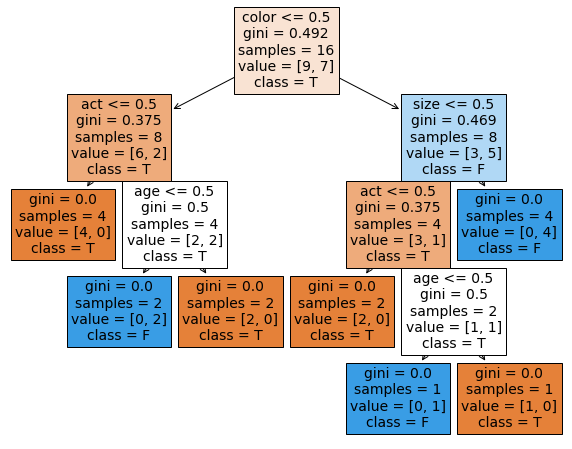

In [104]:
plt.figure(figsize= (10,8))
plot_tree(dt,
          feature_names = ['color','size','act','age'],
          class_names = list(df.inflated.unique()),
         filled = True)

plt.show()

In [195]:
print(export_text(dt,
            feature_names =['color','size','act','age'],
           show_weights = True))

|--- color <= 0.50
|   |--- act <= 0.50
|   |   |--- weights: [4.00, 0.00] class: F
|   |--- act >  0.50
|   |   |--- age <= 0.50
|   |   |   |--- weights: [0.00, 2.00] class: T
|   |   |--- age >  0.50
|   |   |   |--- weights: [2.00, 0.00] class: F
|--- color >  0.50
|   |--- size <= 0.50
|   |   |--- act <= 0.50
|   |   |   |--- weights: [2.00, 0.00] class: F
|   |   |--- act >  0.50
|   |   |   |--- age <= 0.50
|   |   |   |   |--- weights: [0.00, 1.00] class: T
|   |   |   |--- age >  0.50
|   |   |   |   |--- weights: [1.00, 0.00] class: F
|   |--- size >  0.50
|   |   |--- weights: [0.00, 4.00] class: T



# INFORMATION GAIN

In [199]:
df

,color,size,act,age,inflated
0,1.0,1.0,1.0,0.0,T
1,1.0,1.0,1.0,1.0,T
2,1.0,1.0,0.0,0.0,T
3,1.0,1.0,0.0,1.0,T
4,1.0,0.0,1.0,0.0,T
5,1.0,0.0,1.0,1.0,F
6,1.0,0.0,0.0,0.0,F
7,1.0,0.0,0.0,1.0,F
8,0.0,1.0,1.0,0.0,T
9,0.0,1.0,1.0,1.0,F


The decision rules are same for Gini Impurity and Information Gain

InformationGain of a data set is calculated by formula:
    
    -(p1log2(p1) + (p2)log2(p2) + (p3)log2(p3) + ...........)
    
    where p1, p2, p3 are probality of randomly picking respective elements in the dataset
    


**calculating Entopy before split for the dataset**

In [202]:
df.inflated.value_counts()

F    9
T    7
Name: inflated, dtype: int64

In [205]:
EntropyBeforeSplit = - ( (9/16)*np.log2(9/16) + (7/16)*np.log2(7/16)  )
EntropyBeforeSplit

0.9886994082884974

now we calculate information for each question and find the best split

**Question(1) => color < 0.5**

In [211]:
df[df.color<=0.5].inflated.value_counts() #left

F    6
T    2
Name: inflated, dtype: int64

In [212]:
df[df.color>0.5].inflated.value_counts() #right

T    5
F    3
Name: inflated, dtype: int64

In [214]:
EntropyLeft = -( (6/8)*np.log2(6/8) + (2/8)*np.log2(2/8))
EntropyRight= -( (5/8)*np.log2(5/8) + (3/8)*np.log2(3/8))

EntropySplit = (8/16)*EntropyLeft + (8/16) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(1) :',InformationGain)

Information Gain for question(1) : 0.10584334459644851


**Question(2) => size < 0.5**

In [215]:
df[df['size']<=0.5].inflated.value_counts() #left

F    6
T    2
Name: inflated, dtype: int64

In [216]:
df[df['size']>0.5].inflated.value_counts() #right

T    5
F    3
Name: inflated, dtype: int64

In [217]:
EntropyLeft = -( (6/8)*np.log2(6/8) + (2/8)*np.log2(2/8))
EntropyRight= -( (5/8)*np.log2(5/8) + (3/8)*np.log2(3/8))

EntropySplit = (8/16)*EntropyLeft + (8/16) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(2) :',InformationGain)

Information Gain for question(2) : 0.10584334459644851


**Question(3) => act < 0.5**

In [218]:
df[df['act']<=0.5].inflated.value_counts() #left

F    6
T    2
Name: inflated, dtype: int64

In [219]:
df[df['act']>0.5].inflated.value_counts() #right

T    5
F    3
Name: inflated, dtype: int64

In [221]:
EntropyLeft = -( (6/8)*np.log2(6/8) + (2/8)*np.log2(2/8))
EntropyRight= -( (5/8)*np.log2(5/8) + (3/8)*np.log2(3/8))

EntropySplit = (8/16)*EntropyLeft + (8/16) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(3) :',InformationGain)

Information Gain for question(3) : 0.10584334459644851


**Question(4) => age < 0.5**

In [223]:
df[df['age']<=0.5].inflated.value_counts() #left

T    5
F    3
Name: inflated, dtype: int64

In [224]:
df[df['age']>0.5].inflated.value_counts() #right

F    6
T    2
Name: inflated, dtype: int64

In [226]:
EntropyRight = -( (6/8)*np.log2(6/8) + (2/8)*np.log2(2/8))
EntropyLeft = -( (5/8)*np.log2(5/8) + (3/8)*np.log2(3/8))

EntropySplit = (8/16)*EntropyLeft + (8/16) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(4) :',InformationGain)

Information Gain for question(4) : 0.10584334459644851


#### InformationGain is same for  all the questions,hence we can randomly choose any decision to split the data

* selecting the question(1)   i.e attribute color

#### Generating subtrees under root

In [242]:
subtree_root_left = df[df.color<=0.5] #left
subtree_root_right = df[df.color>0.5] #right

**working on left subtree**

In [243]:
subtree_root_left

,color,size,act,age,inflated
8,0.0,1.0,1.0,0.0,T
9,0.0,1.0,1.0,1.0,F
10,0.0,1.0,0.0,0.0,F
11,0.0,1.0,0.0,1.0,F
12,0.0,0.0,1.0,0.0,T
13,0.0,0.0,1.0,1.0,F
14,0.0,0.0,0.0,0.0,F
15,0.0,0.0,0.0,1.0,F


In [307]:
EntropyBeforeSplit = - ( (2/8)*np.log2(2/8) + (6/8)*np.log2(6/8) )
EntropyBeforeSplit

0.8112781244591328

subtree has unique values under color, no split is possible with respective to color attribute             
we have to find the best decision by calculating information gain for remaining columns

**Question(2) => size < 0.5**

In [308]:
subtree_root_left[subtree_root_left['size']<=0.5].inflated.value_counts() #left

F    3
T    1
Name: inflated, dtype: int64

In [309]:
subtree_root_left[subtree_root_left['size']>0.5].inflated.value_counts() #right

F    3
T    1
Name: inflated, dtype: int64

In [310]:
EntropyLeft = -( (3/4)*np.log2(3/4) + (1/4)*np.log2(1/4))
EntropyRight= -( (3/4)*np.log2(3/4) + (1/4)*np.log2(1/4))

EntropySplit = (4/8)*EntropyLeft + (4/8) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(2) :',InformationGain)

Information Gain for question(2) : 0.0


**Question(3) => act < 0.5**

In [311]:
subtree_root_left[subtree_root_left['act']<=0.5].inflated.value_counts() #left

F    4
Name: inflated, dtype: int64

In [312]:
subtree_root_left[subtree_root_left['act']>0.5].inflated.value_counts() #right

F    2
T    2
Name: inflated, dtype: int64

In [313]:
EntropyLeft = -( ((4/4)*np.log2(4/4)) )
EntropyRight= -( (2/4)*np.log2(2/4) + (2/4)*np.log2(2/4))

EntropySplit = (4/8)*EntropyLeft + (4/8) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(3) :',InformationGain)

Information Gain for question(3) : 0.31127812445913283


**Question(4) => age < 0.5**

In [314]:
subtree_root_left[subtree_root_left['age']<=0.5].inflated.value_counts() #left

F    2
T    2
Name: inflated, dtype: int64

In [315]:
subtree_root_left[subtree_root_left['age']>0.5].inflated.value_counts() #left

F    4
Name: inflated, dtype: int64

In [316]:
EntropyRight = -( ((4/4)*np.log2(4/4)) )
EntropyLeft= -( (2/4)*np.log2(2/4) + (2/4)*np.log2(2/4))

EntropySplit = (4/8)*EntropyLeft + (4/8) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(4) :',InformationGain)

Information Gain for question(4) : 0.31127812445913283


Information gain for question(3) and question(4) is same,   
**choosing question(3) to split data**

In [262]:
subtree_root_left[subtree_root_left['act']<=0.5]

,color,size,act,age,inflated
10,0.0,1.0,0.0,0.0,F
11,0.0,1.0,0.0,1.0,F
14,0.0,0.0,0.0,0.0,F
15,0.0,0.0,0.0,1.0,F


the above data frame forms the left subtree ,in which the target(inflated) is homogenous and no need to split furthur

**working on right subtree**

In [326]:
subtree_r = subtree_root_left[subtree_root_left['act']>0.5]
subtree_r

,color,size,act,age,inflated
8,0.0,1.0,1.0,0.0,T
9,0.0,1.0,1.0,1.0,F
12,0.0,0.0,1.0,0.0,T
13,0.0,0.0,1.0,1.0,F


In [317]:
EntropyBeforeSplit = - ( (2/4)*np.log2(2/4) + (2/4)*np.log2(2/4) )
EntropyBeforeSplit

1.0

**Question(4) => age < 0.5**

In [327]:
subtree_r[subtree_r['age'] > 0.5]

,color,size,act,age,inflated
9,0.0,1.0,1.0,1.0,F
13,0.0,0.0,1.0,1.0,F


In [ ]:
in above data in the subtree ,  target(inflated) is homogenous and no need to split further

In [328]:
subtree_final = subtree_r[subtree_r['age'] <= 0.5]
subtree_final

,color,size,act,age,inflated
8,0.0,1.0,1.0,0.0,T
12,0.0,0.0,1.0,0.0,T


The above formed subtrees need not be worked on as they form the leaves on the tree

**working on the right subtree under the root**

In [270]:
subtree_root_right

,color,size,act,age,inflated
0,1.0,1.0,1.0,0.0,T
1,1.0,1.0,1.0,1.0,T
2,1.0,1.0,0.0,0.0,T
3,1.0,1.0,0.0,1.0,T
4,1.0,0.0,1.0,0.0,T
5,1.0,0.0,1.0,1.0,F
6,1.0,0.0,0.0,0.0,F
7,1.0,0.0,0.0,1.0,F


In [282]:
EntropyBeforeSplit   = - ( (5/8)*np.log2(5/8) + (3/8) * np.log2(3/8) )
EntropyBeforeSplit

0.954434002924965

subtree has unique values under color, no split is possible with respective to color attribute      
we have to find the best decision by calculating information gain for remaining columns

**Question(2) => size < 0.5**

In [283]:
subtree_root_right[subtree_root_right['size']<=0.5].inflated.value_counts() #left

F    3
T    1
Name: inflated, dtype: int64

In [284]:
subtree_root_right[subtree_root_right['size']>0.5].inflated.value_counts() #right

T    4
Name: inflated, dtype: int64

In [285]:
EntropyRight = -( ((4/4)*np.log2(4/4)) )
EntropyLeft= -( (3/4)*np.log2(3/4) + (1/4)*np.log2(1/4))

EntropySplit = (4/8)*EntropyLeft + (4/8) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(2) :',InformationGain)

Information Gain for question(2) : 0.5487949406953987


**Question(3) => act < 0.5**

In [286]:
subtree_root_right[subtree_root_right['act']<=0.5].inflated.value_counts() #left

F    2
T    2
Name: inflated, dtype: int64

In [287]:
subtree_root_right[subtree_root_right['act']>0.5].inflated.value_counts() #right

T    3
F    1
Name: inflated, dtype: int64

In [288]:
EntropyRight = -( (3/4)*np.log2(3/4) + (1/4)*np.log2(1/4))
EntropyLeft= -( (2/4)*np.log2(2/4) + (2/4)*np.log2(2/4))

EntropySplit = (4/8)*EntropyLeft + (4/8) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(3) :',InformationGain)

Information Gain for question(3) : 0.04879494069539858


**Question(4) => age < 0.5**

In [289]:
subtree_root_right[subtree_root_right['age']<=0.5].inflated.value_counts() #left

T    3
F    1
Name: inflated, dtype: int64

In [290]:
subtree_root_right[subtree_root_right['age']>0.5].inflated.value_counts() #right

F    2
T    2
Name: inflated, dtype: int64

In [291]:
EntropyLeft = -( (3/4)*np.log2(3/4) + (1/4)*np.log2(1/4))
EntropyRight = -( (2/4)*np.log2(2/4) + (2/4)*np.log2(2/4))

EntropySplit = (4/8)*EntropyLeft + (4/8) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(4) :',InformationGain)

Information Gain for question(4) : 0.04879494069539858


#### Information gain for Question(2) is high, hence using size attribute to split the data

In [292]:
subtree_root_right[subtree_root_right['size']>0.5]

,color,size,act,age,inflated
0,1.0,1.0,1.0,0.0,T
1,1.0,1.0,1.0,1.0,T
2,1.0,1.0,0.0,0.0,T
3,1.0,1.0,0.0,1.0,T


The above subtree need not be splitted as the target is homogenous

In [295]:
subtree_r = subtree_root_right[subtree_root_right['size']<=0.5]
subtree_r

,color,size,act,age,inflated
4,1.0,0.0,1.0,0.0,T
5,1.0,0.0,1.0,1.0,F
6,1.0,0.0,0.0,0.0,F
7,1.0,0.0,0.0,1.0,F


In [294]:
EntropyBeforeSplit = - ( (1/4)*np.log2(1/4) + (3/4)*np.log2(3/4) )
EntropyBeforeSplit

0.8112781244591328

color and size attributes have homogenous values , decision has to made with other attributes

**Question(3) => act < 0.5**

In [296]:
subtree_r[subtree_r['act'] <= 0.5]

,color,size,act,age,inflated
6,1.0,0.0,0.0,0.0,F
7,1.0,0.0,0.0,1.0,F


In [297]:
subtree_r[subtree_r['act'] > 0.5]

,color,size,act,age,inflated
4,1.0,0.0,1.0,0.0,T
5,1.0,0.0,1.0,1.0,F


In [298]:
EntropyLeft = 0
EntropyRight = -( (1/2)*np.log2(1/2) + (1/2)*np.log2(1/2))

EntropySplit = (2/4)*EntropyLeft + (2/4) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(3) :',InformationGain)

Information Gain for question(3) : 0.31127812445913283


**Question(4) => age < 0.5**

In [299]:
subtree_r[subtree_r['age'] <= 0.5]

,color,size,act,age,inflated
4,1.0,0.0,1.0,0.0,T
6,1.0,0.0,0.0,0.0,F


In [300]:
subtree_r[subtree_r['age'] > 0.5]

,color,size,act,age,inflated
5,1.0,0.0,1.0,1.0,F
7,1.0,0.0,0.0,1.0,F


In [301]:
EntropyRight = 0
EntropyLeft = -( (1/2)*np.log2(1/2) + (1/2)*np.log2(1/2))

EntropySplit = (2/4)*EntropyLeft + (2/4) * EntropyRight
InformationGain = EntropyBeforeSplit - EntropySplit
print('Information Gain for question(4) :',InformationGain)

Information Gain for question(4) : 0.31127812445913283


Question(3) and Question(4) have same InformationGain,      
**choosing question(3) to split the data**

In [302]:
subtree_r[subtree_r['act'] <= 0.5]

,color,size,act,age,inflated
6,1.0,0.0,0.0,0.0,F
7,1.0,0.0,0.0,1.0,F


the above subtree need not be worked, as the target is homogenous

In [304]:
subtree_final = subtree_r[subtree_r['act'] > 0.5]
subtree_final

,color,size,act,age,inflated
4,1.0,0.0,1.0,0.0,T
5,1.0,0.0,1.0,1.0,F


it is clear that the above subtree is to be split using question(3)

In [305]:
subtree_final[subtree_final['age'] <= 0.5]

,color,size,act,age,inflated
4,1.0,0.0,1.0,0.0,T


In [306]:
subtree_final[subtree_final['age'] > 0.5]

,color,size,act,age,inflated
5,1.0,0.0,1.0,1.0,F


the above subtrees are formed by splitting on basis of age attribute, which form the leaves of the tree

### Tree formed from above steps (decisions and leaves)

<img src = 'https://github.com/Rupakanth/EdYoda/blob/master/balloon_Informationgain.jpg?raw=true'>

## Forming a model using Decision Tree classifier and criterion as entropy

In [236]:
dt_e = DecisionTreeClassifier(criterion = 'entropy')

In [237]:
dt_e.fit(df.drop(columns= 'inflated'),df.inflated)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Generating Tree using Graphviz

In [330]:
export_graphviz(dt_e,'dttree_e')

<img src = 'https://github.com/Rupakanth/EdYoda/blob/master/graphviz_balloon_IG.png?raw=true'>

### generting tree without using Graphviz

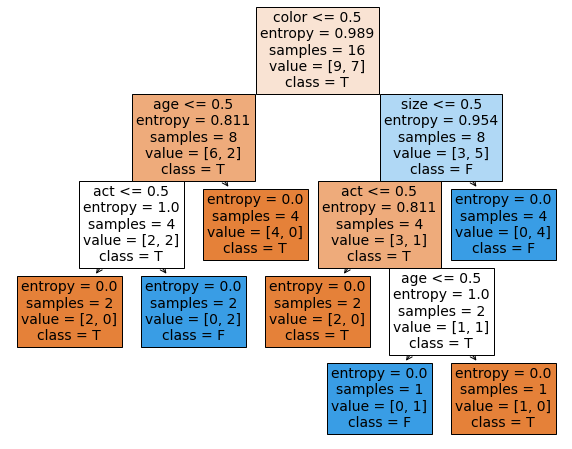

In [238]:
plt.figure(figsize = (10,8))
plot_tree(dt_e,
          feature_names = ['color','size','act','age'],
          class_names = list(df.inflated.unique()),
          filled = True)

plt.show()

In [331]:
print(export_text(dt_e,
            feature_names =['color','size','act','age'],
           show_weights = True))

|--- color <= 0.50
|   |--- age <= 0.50
|   |   |--- act <= 0.50
|   |   |   |--- weights: [2.00, 0.00] class: F
|   |   |--- act >  0.50
|   |   |   |--- weights: [0.00, 2.00] class: T
|   |--- age >  0.50
|   |   |--- weights: [4.00, 0.00] class: F
|--- color >  0.50
|   |--- size <= 0.50
|   |   |--- act <= 0.50
|   |   |   |--- weights: [2.00, 0.00] class: F
|   |   |--- act >  0.50
|   |   |   |--- age <= 0.50
|   |   |   |   |--- weights: [0.00, 1.00] class: T
|   |   |   |--- age >  0.50
|   |   |   |   |--- weights: [1.00, 0.00] class: F
|   |--- size >  0.50
|   |   |--- weights: [0.00, 4.00] class: T

